In [1]:
# !pip install requests

In [2]:
# import requests

# # URL of the dataset
# url = 'https://download.cms.gov/openpayments/PGYR23_P062824/OP_DTL_GNRL_PGYR2023_P06282024_06122024.csv'

# # Send a request to download the file
# response = requests.get(url)

# # Save the file locally
# with open('OP_DTL_GNRL_PGYR2023_P06282024_06122024.csv', 'wb') as file:
#     file.write(response.content)

# print("Dataset downloaded successfully!")


In [3]:
import pandas as pd

df = pd.read_csv('OP_DTL_GNRL_PGYR2023_P06282024_06122024.csv', low_memory=False)

df.head()

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Covered_Recipient_Profile_ID,Covered_Recipient_NPI,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,...,Associated_Drug_or_Biological_NDC_4,Associated_Device_or_Medical_Supply_PDI_4,Covered_or_Noncovered_Indicator_5,Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5,Product_Category_or_Therapeutic_Area_5,Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5,Associated_Drug_or_Biological_NDC_5,Associated_Device_or_Medical_Supply_PDI_5,Program_Year,Payment_Publication_Date
0,NEW,Covered Recipient Physician,NaN,NaN,NaN,287788.0,1.356428e+09,SY,Q,LE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,06/28/2024
1,NEW,Covered Recipient Physician,NaN,NaN,NaN,271599.0,1.992726e+09,JAMES,G,BASS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,06/28/2024
2,NEW,Covered Recipient Physician,NaN,NaN,NaN,336633.0,1.407915e+09,PETER,NaN,BRANDON,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,06/28/2024
3,NEW,Covered Recipient Physician,NaN,NaN,NaN,1095727.0,1.720162e+09,LEO,RICHARD,BRANCAZIO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,06/28/2024
4,NEW,Covered Recipient Physician,NaN,NaN,NaN,1256215.0,1.386626e+09,KARRI,K,CHINN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,06/28/2024


In [4]:
# List of values you want to keep in the column, converted to lowercase
valid_manufacturers = [
    'modernatx, inc.',
    'abbvie inc.',
    'roche diagnostics corporation',
    'amgen inc.',
    'bristol myers squibb company',
    'gilead sciences, inc.',
    'vertex pharmaceuticals incorporated',
    'biogen, inc.',
    'regeneron pharmaceuticals, inc.',
    'seagen inc.',
    'nanostring technologies, inc.',
    'thermo fisher scientific asheville llc',
    'agilent technologies, inc.',
    'beigene usa, inc.',
    'illumina, inc.',
    'genmab u.s., inc.',
    'alnylam pharmaceuticals inc.',
    'argenx us, inc.',
    'aerie pharmaceuticals, inc.',
    'bluebird bio, inc.'
]

# Convert the column values to lowercase and apply the filter
filtered_df = df[df['Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name'].str.lower().isin(valid_manufacturers)]

# Display the filtered DataFrame
print(filtered_df)

         Change_Type               Covered_Recipient_Type  \
199980           NEW  Covered Recipient Teaching Hospital   
199981           NEW  Covered Recipient Teaching Hospital   
202707           NEW  Covered Recipient Teaching Hospital   
202708           NEW  Covered Recipient Teaching Hospital   
202709           NEW  Covered Recipient Teaching Hospital   
...              ...                                  ...   
14591491         NEW          Covered Recipient Physician   
14591492         NEW          Covered Recipient Physician   
14591493         NEW          Covered Recipient Physician   
14591494         NEW          Covered Recipient Physician   
14591923         NEW          Covered Recipient Physician   

          Teaching_Hospital_CCN  Teaching_Hospital_ID  \
199980                 450690.0               13797.0   
199981                 223302.0               12746.0   
202707                 140049.0               13595.0   
202708                 503300.0        

In [5]:
# List of columns to drop (case-sensitive)
columns_to_drop = [
    'Change_Type', 'Teaching_Hospital_CCN', 'Teaching_Hospital_ID', 'Teaching_Hospital_Name', 'Covered_Recipient_Profile_ID',
    'Covered_Recipient_NPI', 'Recipient_Primary_Business_Street_Address_Line1', 
    'Recipient_Primary_Business_Street_Address_Line2', 'Recipient_City', 'Recipient_Zip_Code', 
    'Recipient_Country', 'Recipient_Province', 'Recipient_Postal_Code', 
    'Covered_Recipient_Primary_Type_2', 'Covered_Recipient_Primary_Type_3', 
    'Covered_Recipient_Primary_Type_4', 'Covered_Recipient_Primary_Type_5', 
    'Covered_Recipient_Primary_Type_6', 'Covered_Recipient_Specialty_2', 
    'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4', 
    'Covered_Recipient_Specialty_5', 'Covered_Recipient_Specialty_6', 
    'Covered_Recipient_License_State_code2', 'Covered_Recipient_License_State_code3', 
    'Covered_Recipient_License_State_code4', 'Covered_Recipient_License_State_code5', 
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID', 
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Country', 
    'City_of_Travel', 'Covered_or_Noncovered_Indicator_1', 
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1', 
    'Product_Category_or_Therapeutic_Area_1', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1', 
    'Associated_Drug_or_Biological_NDC_1', 'Associated_Device_or_Medical_Supply_PDI_1', 
    'Covered_or_Noncovered_Indicator_2', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2', 
    'Product_Category_or_Therapeutic_Area_2', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2', 
    'Associated_Drug_or_Biological_NDC_2', 'Associated_Device_or_Medical_Supply_PDI_2', 
    'Covered_or_Noncovered_Indicator_3', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3', 
    'Product_Category_or_Therapeutic_Area_3', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3', 
    'Associated_Drug_or_Biological_NDC_3', 'Associated_Device_or_Medical_Supply_PDI_3', 
    'Covered_or_Noncovered_Indicator_4', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4', 
    'Product_Category_or_Therapeutic_Area_4', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4', 
    'Associated_Drug_or_Biological_NDC_4', 'Associated_Device_or_Medical_Supply_PDI_4', 
    'Covered_or_Noncovered_Indicator_5', 'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5', 
    'Product_Category_or_Therapeutic_Area_5', 'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5', 
    'Associated_Drug_or_Biological_NDC_5', 'Associated_Device_or_Medical_Supply_PDI_5'
]

filtered_df = filtered_df.drop(columns=columns_to_drop)

filtered_df.head()

,Covered_Recipient_Type,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,...,Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value,Charity_Indicator,Third_Party_Equals_Covered_Recipient_Indicator,Contextual_Information,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date
199980,Covered Recipient Teaching Hospital,NaN,NaN,NaN,NaN,TX,NaN,NaN,NaN,Thermo Fisher Scientific Asheville LLC,...,NaN,NaN,NaN,NaN,No,981206085,No,No,2023,06/28/2024
199981,Covered Recipient Teaching Hospital,NaN,NaN,NaN,NaN,MA,NaN,NaN,NaN,Thermo Fisher Scientific Asheville LLC,...,NaN,NaN,NaN,NaN,No,981206087,No,Yes,2023,06/28/2024
202707,Covered Recipient Teaching Hospital,NaN,NaN,NaN,NaN,IL,NaN,NaN,NaN,Thermo Fisher Scientific Asheville LLC,...,NaN,NaN,NaN,NaN,No,981206061,No,No,2023,06/28/2024
202708,Covered Recipient Teaching Hospital,NaN,NaN,NaN,NaN,WA,NaN,NaN,NaN,Thermo Fisher Scientific Asheville LLC,...,NaN,NaN,NaN,NaN,No,981206063,No,No,2023,06/28/2024
202709,Covered Recipient Teaching Hospital,NaN,NaN,NaN,NaN,OR,NaN,NaN,NaN,Thermo Fisher Scientific Asheville LLC,...,NaN,NaN,NaN,NaN,No,981206065,No,No,2023,06/28/2024


In [6]:
df_filtered = filtered_df[filtered_df['Covered_Recipient_Type'] != 'Covered Recipient Teaching Hospital']
df_filtered.head()

,Covered_Recipient_Type,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,...,Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value,Charity_Indicator,Third_Party_Equals_Covered_Recipient_Indicator,Contextual_Information,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date
925640,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084757,No,Yes,2023,06/28/2024
925641,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084759,No,Yes,2023,06/28/2024
925642,Covered Recipient Physician,ASHRAF,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084761,No,Yes,2023,06/28/2024
925643,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084763,No,Yes,2023,06/28/2024
925644,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084765,No,Yes,2023,06/28/2024


In [7]:
df_filtered.head(20)

,Covered_Recipient_Type,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,...,Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value,Charity_Indicator,Third_Party_Equals_Covered_Recipient_Indicator,Contextual_Information,Delay_in_Publication_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date
925640,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084757,No,Yes,2023,06/28/2024
925641,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084759,No,Yes,2023,06/28/2024
925642,Covered Recipient Physician,ASHRAF,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084761,No,Yes,2023,06/28/2024
925643,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084763,No,Yes,2023,06/28/2024
925644,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084765,No,Yes,2023,06/28/2024
925645,Covered Recipient Physician,FARID,NaN,ABUSHAMAT,NaN,TX,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,TX,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084767,No,Yes,2023,06/28/2024
925646,Covered Recipient Physician,FARID,NaN,ABUSHAMAT,NaN,TX,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,TX,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084769,No,Yes,2023,06/28/2024
925647,Covered Recipient Physician,FARID,NaN,ABUSHAMAT,NaN,TX,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TX,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084771,No,Yes,2023,06/28/2024
925648,Covered Recipient Physician,FARID,NaN,ABUSHAMAT,NaN,TX,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TX,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084773,No,Yes,2023,06/28/2024
925649,Covered Recipient Physician,FARID,NaN,ABUSHAMAT,NaN,TX,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TX,ABBVIE INC.,...,NaN,NaN,NaN,NaN,No,996084775,No,Yes,2023,06/28/2024


In [8]:
more_columns_to_drop = ['Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value', 'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value', 'Charity_Indicator', 'Third_Party_Equals_Covered_Recipient_Indicator', 'Contextual_Information', 'Delay_in_Publication_Indicator']



df_filtered = df_filtered.drop(columns=more_columns_to_drop)

df_filtered

,Covered_Recipient_Type,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,...,Nature_of_Payment_or_Transfer_of_Value,State_of_Travel,Country_of_Travel,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date
925640,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,Food and Beverage,NaN,NaN,No,No Third Party Payment,996084757,No,Yes,2023,06/28/2024
925641,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,Food and Beverage,NaN,NaN,No,No Third Party Payment,996084759,No,Yes,2023,06/28/2024
925642,Covered Recipient Physician,ASHRAF,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,OH,ABBVIE INC.,...,Food and Beverage,NaN,NaN,No,No Third Party Payment,996084761,No,Yes,2023,06/28/2024
925643,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,Food and Beverage,NaN,NaN,No,No Third Party Payment,996084763,No,Yes,2023,06/28/2024
925644,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,Food and Beverage,NaN,NaN,No,No Third Party Payment,996084765,No,Yes,2023,06/28/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591491,Covered Recipient Physician,DAVID,NaN,SPIGEL,NaN,TN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TN,AbbVie Inc.,...,Consulting Fee,NaN,NaN,No,Entity,999088453,No,Yes,2023,06/28/2024
14591492,Covered Recipient Physician,SHAJI,NaN,KUMAR,NaN,MN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,MN,AbbVie Inc.,...,Consulting Fee,NaN,NaN,No,Entity,997697999,No,No,2023,06/28/2024
14591493,Covered Recipient Physician,MELISSA,NaN,JOHNSON,NaN,TN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TN,AbbVie Inc.,...,Consulting Fee,NaN,NaN,No,Entity,997573595,No,No,2023,06/28/2024
14591494,Covered Recipient Physician,GERALD,NaN,FALCHOOK,NaN,CO,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,CO,AbbVie Inc.,...,Consulting Fee,NaN,NaN,No,Entity,997227239,No,No,2023,06/28/2024


In [9]:
df_filtered = df_filtered.drop(columns=['State_of_Travel', 'Country_of_Travel'])
df_filtered

,Covered_Recipient_Type,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,...,Number_of_Payments_Included_in_Total_Amount,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date
925640,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084757,No,Yes,2023,06/28/2024
925641,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084759,No,Yes,2023,06/28/2024
925642,Covered Recipient Physician,ASHRAF,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084761,No,Yes,2023,06/28/2024
925643,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084763,No,Yes,2023,06/28/2024
925644,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084765,No,Yes,2023,06/28/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14591491,Covered Recipient Physician,DAVID,NaN,SPIGEL,NaN,TN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TN,AbbVie Inc.,...,1,Cash or cash equivalent,Consulting Fee,No,Entity,999088453,No,Yes,2023,06/28/2024
14591492,Covered Recipient Physician,SHAJI,NaN,KUMAR,NaN,MN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,MN,AbbVie Inc.,...,1,Cash or cash equivalent,Consulting Fee,No,Entity,997697999,No,No,2023,06/28/2024
14591493,Covered Recipient Physician,MELISSA,NaN,JOHNSON,NaN,TN,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,TN,AbbVie Inc.,...,1,Cash or cash equivalent,Consulting Fee,No,Entity,997573595,No,No,2023,06/28/2024
14591494,Covered Recipient Physician,GERALD,NaN,FALCHOOK,NaN,CO,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,CO,AbbVie Inc.,...,1,Cash or cash equivalent,Consulting Fee,No,Entity,997227239,No,No,2023,06/28/2024


In [10]:
df_filtered = df_filtered.reset_index(drop=True)
#df_filtered.to_csv('filtered_output_v1.csv', index=False)

In [1]:
import pandas as pd
df_filtered = pd.read_csv('filtered_output_v1.csv')

In [2]:
df_filtered = df_filtered[['Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name', 'Covered_Recipient_Last_Name']]

# Function to combine names based on the presence of a middle name
def combine_names(row):
    if pd.isna(row['Covered_Recipient_Middle_Name']):
        # If middle name is NaN, combine first and last name
        return f"{row['Covered_Recipient_First_Name']} {row['Covered_Recipient_Last_Name']}"
    else:
        # If middle name is available, combine first, middle, and last name
        return f"{row['Covered_Recipient_First_Name']} {row['Covered_Recipient_Middle_Name']} {row['Covered_Recipient_Last_Name']}"

# Apply the function to create a new 'Full_Name' column
df_filtered['Full_Name'] = df_filtered.apply(combine_names, axis=1)

# # Drop the individual first and last name columns if no longer needed
df_filtered = df_filtered.drop(['Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name', 'Covered_Recipient_Last_Name'], axis=1)

# Verify the result
print(df_filtered[['Full_Name']])

                  Full_Name
0        MOHAMMED ABUSAMIEH
1        MOHAMMED ABUSAMIEH
2          ASHRAF ABUSHAHIN
3           LAITH ABUSHAHIN
4           LAITH ABUSHAHIN
...                     ...
2376914        DAVID SPIGEL
2376915         SHAJI KUMAR
2376916     MELISSA JOHNSON
2376917     GERALD FALCHOOK
2376918         ALAN GARBER

[2376919 rows x 1 columns]


In [3]:
test_gender = df_filtered

In [13]:
test_gender

,Full_Name
0,MOHAMMED ABUSAMIEH
1,MOHAMMED ABUSAMIEH
2,ASHRAF ABUSHAHIN
3,LAITH ABUSHAHIN
4,LAITH ABUSHAHIN
...,...
2376914,DAVID SPIGEL
2376915,SHAJI KUMAR
2376916,MELISSA JOHNSON
2376917,GERALD FALCHOOK


In [4]:
# Make an explicit copy of the DataFrame before modifying
test_gender = test_gender.copy()

# Now modify the DataFrame safely
test_gender['Full_Name'] = test_gender['Full_Name'].str.title()
print(test_gender)

                  Full_Name
0        Mohammed Abusamieh
1        Mohammed Abusamieh
2          Ashraf Abushahin
3           Laith Abushahin
4           Laith Abushahin
...                     ...
2376914        David Spigel
2376915         Shaji Kumar
2376916     Melissa Johnson
2376917     Gerald Falchook
2376918         Alan Garber

[2376919 rows x 1 columns]


In [5]:
test_gender = test_gender.drop_duplicates(subset='Full_Name')

test_gender.reset_index(drop=True, inplace=True)

In [16]:
test_gender

,Full_Name
0,Mohammed Abusamieh
1,Ashraf Abushahin
2,Laith Abushahin
3,Farid Abushamat
4,Maria Acelajado Onoya
...,...
311413,Lisa Kiblinger
311414,Margaret J. Povloski
311415,Angela M. Leclerc
311416,Sampath Wijesinghe


In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
tokenizer = AutoTokenizer.from_pretrained("malcolm/REA_GenderIdentification_v1")
model = AutoModelForSequenceClassification.from_pretrained("malcolm/REA_GenderIdentification_v1")

In [7]:
def get_genders_from_transformer_model(model, tokenizer, names, batch_size=64):
    model.eval()
    genders = []

    for i in range(0, len(names), batch_size):
        batch_names = names[i:i + batch_size]
        inputs = tokenizer(batch_names, return_tensors="pt", padding=True, truncation=True)  # Removed .tolist()

        with torch.no_grad():
            outputs = model(**inputs)
            logits = outputs.logits

        probabilities = torch.softmax(logits, dim=1)
        predicted_classes = torch.argmax(probabilities, dim=1)
        class_labels = {0: "Female", 1: "Male"}

        # Convert the predicted classes to labels
        batch_genders = [class_labels.get(pred.item(), "Unknown") for pred in predicted_classes]
        genders.extend(batch_genders)

    return genders


In [19]:
# def get_gender_from_transformer_model(model, tokenizer, input_text="John Doe"):
#   inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True)
#   model.eval()

#   with torch.no_grad():
#       outputs = model(**inputs)


#       logits = outputs.logits


#   probabilities = torch.softmax(logits, dim=1)
#   predicted_class = torch.argmax(probabilities, dim=1)
#   class_labels = {0: "Female", 1: "Male"}


#   predicted_label = class_labels.get(predicted_class.item(), "Unknown")


#   #print(f"Predicted class index: {predicted_class.item()}")
#   #print(f"Probabilities: {probabilities.numpy()[0]}")
#   #print(f"Predicted gender: {predicted_label}")
#   return predicted_label

In [20]:
# test_gender['Gender_from_bert'] = test_gender['Full_Name'].apply(lambda name: get_gender_from_transformer_model(model, tokenizer, name))

In [8]:
test_gender['Gender_from_bert'] = test_gender['Full_Name'].apply(lambda name: get_genders_from_transformer_model(model, tokenizer, name))

In [9]:
test_gender

,Full_Name,Gender_from_bert
0,Mohammed Abusamieh,[Male]
1,Ashraf Abushahin,[Male]
2,Laith Abushahin,[Male]
3,Farid Abushamat,[Male]
4,Maria Acelajado Onoya,[Female]
...,...,...
311413,Lisa Kiblinger,[Female]
311414,Margaret J. Povloski,[Female]
311415,Angela M. Leclerc,[Female]
311416,Sampath Wijesinghe,[Male]


In [23]:
test_gender.to_csv('gender.csv', index=False)

In [11]:
df = pd.read_csv('filtered_output_v1.csv')

In [12]:
df.head()

,Covered_Recipient_Type,Covered_Recipient_First_Name,Covered_Recipient_Middle_Name,Covered_Recipient_Last_Name,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,...,Number_of_Payments_Included_in_Total_Amount,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date
0,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084757,No,Yes,2023,06/28/2024
1,Covered Recipient Physician,MOHAMMED,NaN,ABUSAMIEH,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084759,No,Yes,2023,06/28/2024
2,Covered Recipient Physician,ASHRAF,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084761,No,Yes,2023,06/28/2024
3,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084763,No,Yes,2023,06/28/2024
4,Covered Recipient Physician,LAITH,NaN,ABUSHAHIN,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,...,1,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084765,No,Yes,2023,06/28/2024


In [13]:
# Apply the function row-wise to create the 'Full_Name' column
df['Full_Name'] = df.apply(combine_names, axis=1)

# Optionally drop the original name columns after creating 'Full_Name'
df = df.drop(columns=['Covered_Recipient_First_Name', 'Covered_Recipient_Middle_Name', 'Covered_Recipient_Last_Name'])

df.head()

,Covered_Recipient_Type,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Total_Amount_of_Payment_USDollars,...,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date,Full_Name
0,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,10.38,...,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084757,No,Yes,2023,06/28/2024,MOHAMMED ABUSAMIEH
1,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,18.18,...,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084759,No,Yes,2023,06/28/2024,MOHAMMED ABUSAMIEH
2,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,OH,ABBVIE INC.,AbbVie Inc.,IL,30.06,...,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084761,No,Yes,2023,06/28/2024,ASHRAF ABUSHAHIN
3,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,17.98,...,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084763,No,Yes,2023,06/28/2024,LAITH ABUSHAHIN
4,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,21.54,...,In-kind items and services,Food and Beverage,No,No Third Party Payment,996084765,No,Yes,2023,06/28/2024,LAITH ABUSHAHIN


In [17]:
# Now modify the DataFrame safely
df['Full_Name'] = df['Full_Name'].str.title()

In [21]:
# Merge df with test_gender on the 'Full_Name' column
df = pd.merge(df, test_gender[['Full_Name', 'Gender_from_bert']], on='Full_Name', how='left')

df.head()

,Covered_Recipient_Type,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Total_Amount_of_Payment_USDollars,...,Nature_of_Payment_or_Transfer_of_Value,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date,Full_Name,Gender_from_bert
0,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,10.38,...,Food and Beverage,No,No Third Party Payment,996084757,No,Yes,2023,06/28/2024,Mohammed Abusamieh,[Male]
1,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,18.18,...,Food and Beverage,No,No Third Party Payment,996084759,No,Yes,2023,06/28/2024,Mohammed Abusamieh,[Male]
2,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Family Med...,OH,ABBVIE INC.,AbbVie Inc.,IL,30.06,...,Food and Beverage,No,No Third Party Payment,996084761,No,Yes,2023,06/28/2024,Ashraf Abushahin,[Male]
3,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,17.98,...,Food and Beverage,No,No Third Party Payment,996084763,No,Yes,2023,06/28/2024,Laith Abushahin,[Male]
4,Covered Recipient Physician,NaN,OH,Medical Doctor,Allopathic & Osteopathic Physicians|Internal M...,OH,ABBVIE INC.,AbbVie Inc.,IL,21.54,...,Food and Beverage,No,No Third Party Payment,996084765,No,Yes,2023,06/28/2024,Laith Abushahin,[Male]


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376919 entries, 0 to 2376918
Data columns (total 23 columns):
 #   Column                                                          Dtype  
---  ------                                                          -----  
 0   Covered_Recipient_Type                                          object 
 1   Covered_Recipient_Name_Suffix                                   object 
 2   Recipient_State                                                 object 
 3   Covered_Recipient_Primary_Type_1                                object 
 4   Covered_Recipient_Specialty_1                                   object 
 5   Covered_Recipient_License_State_code1                           object 
 6   Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name       object 
 7   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name   object 
 8   Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State  object 
 9   Total_Amount_of_Payment_USDollars  

In [25]:
df.describe(include='all')

,Covered_Recipient_Type,Covered_Recipient_Name_Suffix,Recipient_State,Covered_Recipient_Primary_Type_1,Covered_Recipient_Specialty_1,Covered_Recipient_License_State_code1,Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_State,Total_Amount_of_Payment_USDollars,...,Nature_of_Payment_or_Transfer_of_Value,Physician_Ownership_Indicator,Third_Party_Payment_Recipient_Indicator,Record_ID,Dispute_Status_for_Publication,Related_Product_Indicator,Program_Year,Payment_Publication_Date,Full_Name,Gender_from_bert
count,2376919,14718,2376816,2376919,2376919,2376919,2376919,2376919,2376919,2.376919e+06,...,2376919,2209569,2376919,2.376919e+06,2376919,2376919,2376919.0,2376919,2376919,2376919
unique,2,13,56,12,305,57,20,18,7,NaN,...,9,1,3,NaN,2,2,NaN,1,311418,2
top,Covered Recipient Physician,JR.,TX,Medical Doctor,Physician Assistants & Advanced Practice Nursi...,CA,ABBVIE INC.,ABBVIE INC.,IL,NaN,...,Food and Beverage,No,No Third Party Payment,NaN,No,Yes,NaN,06/28/2024,Misty Lyn Shedd,[Female]
freq,1382657,6694,210215,1172540,268275,223778,1762270,1264868,1763202,NaN,...,2252507,2209569,2361200,NaN,2376918,2314355,NaN,2376919,507,1207567
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.138003e+02,...,NaN,NaN,NaN,1.006589e+09,NaN,NaN,2023.0,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.089838e+04,...,NaN,NaN,NaN,1.106329e+07,NaN,NaN,0.0,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e-02,...,NaN,NaN,NaN,9.956288e+08,NaN,NaN,2023.0,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.260000e+01,...,NaN,NaN,NaN,9.978431e+08,NaN,NaN,2023.0,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.784000e+01,...,NaN,NaN,NaN,1.003609e+09,NaN,NaN,2023.0,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.468000e+01,...,NaN,NaN,NaN,1.010206e+09,NaN,NaN,2023.0,NaN,NaN,NaN


In [30]:
# Ensure all values in the 'Gender_from_bert' column are strings
df['Gender_from_bert'] = df['Gender_from_bert'].astype(str)

# Now, remove the square brackets if present and handle leading/trailing spaces
df['Gender_from_bert'] = df['Gender_from_bert'].str.replace('[', '', regex=False).str.replace(']', '', regex=False).str.strip()

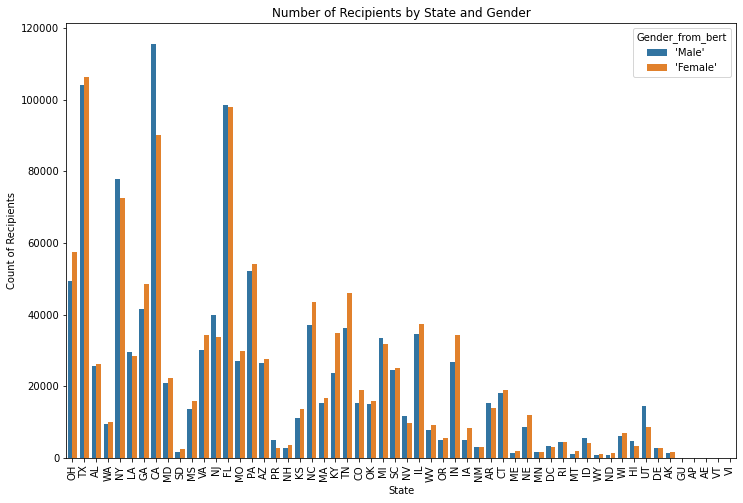

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Recipient_State', hue='Gender_from_bert', data=df)
plt.title('Number of Recipients by State and Gender')
plt.xticks(rotation=90)
plt.ylabel('Count of Recipients')
plt.xlabel('State')
plt.show()

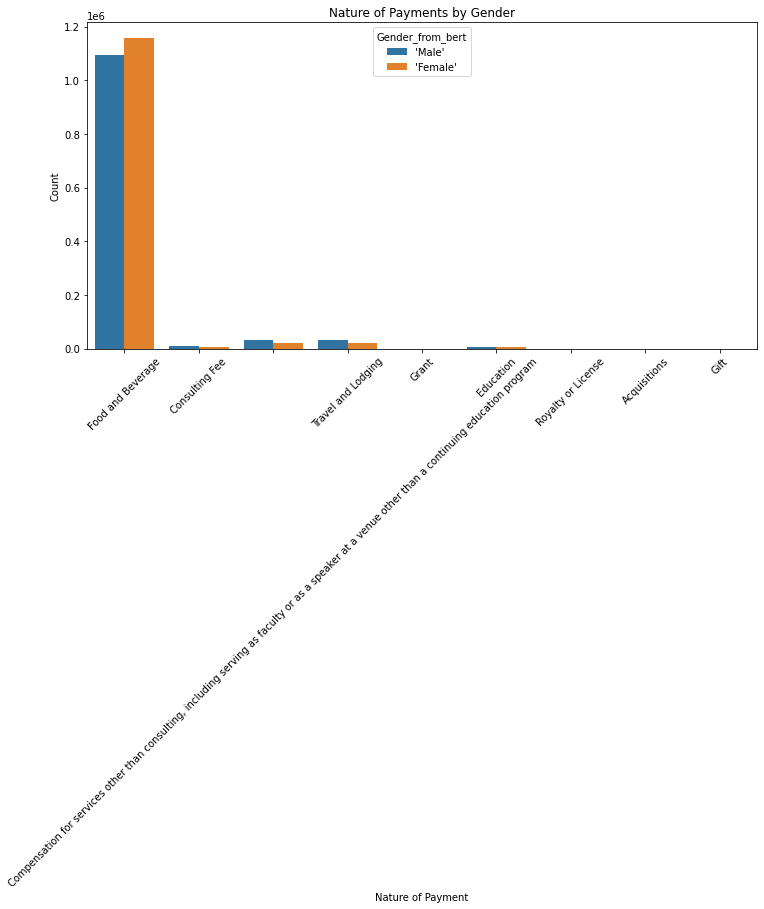

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Nature_of_Payment_or_Transfer_of_Value', hue='Gender_from_bert', data=df)
plt.title('Nature of Payments by Gender')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.xlabel('Nature of Payment')
plt.show()

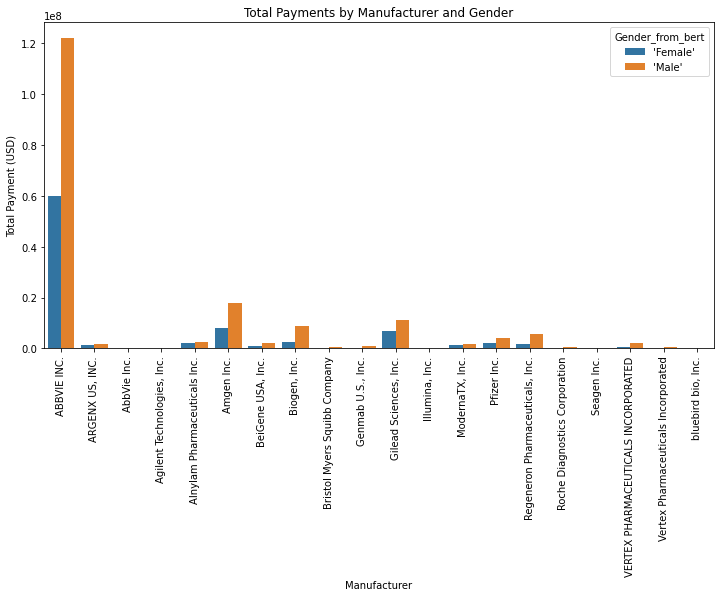

In [35]:
plt.figure(figsize=(12, 6))
total_payments = df.groupby(['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].sum().reset_index()

sns.barplot(x='Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', y='Total_Amount_of_Payment_USDollars', hue='Gender_from_bert', data=total_payments)
plt.title('Total Payments by Manufacturer and Gender')
plt.xticks(rotation=90)
plt.ylabel('Total Payment (USD)')
plt.xlabel('Manufacturer')
plt.show()


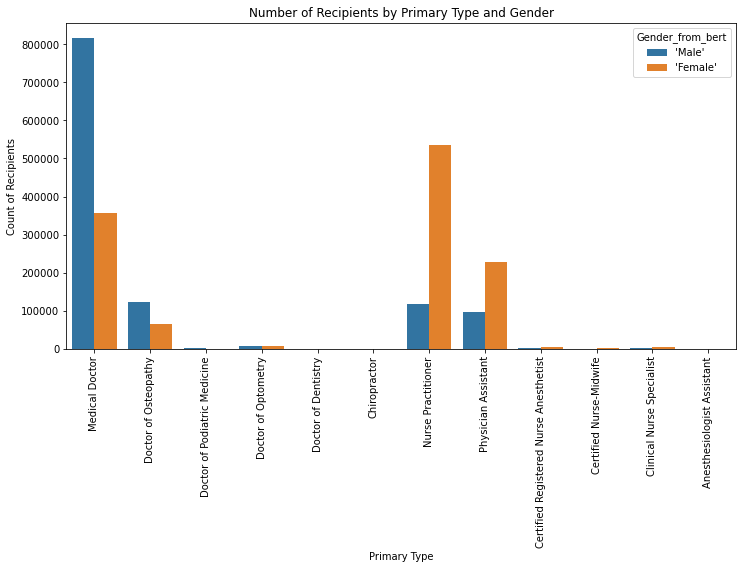

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Covered_Recipient_Primary_Type_1', hue='Gender_from_bert', data=df)
plt.title('Number of Recipients by Primary Type and Gender')
plt.xticks(rotation=90)
plt.ylabel('Count of Recipients')
plt.xlabel('Primary Type')
plt.show()


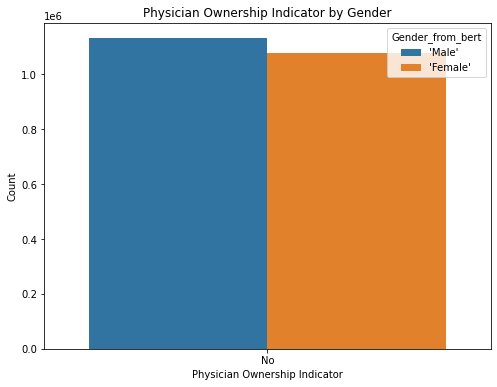

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Physician_Ownership_Indicator', hue='Gender_from_bert', data=df)
plt.title('Physician Ownership Indicator by Gender')
plt.ylabel('Count')
plt.xlabel('Physician Ownership Indicator')
plt.show()


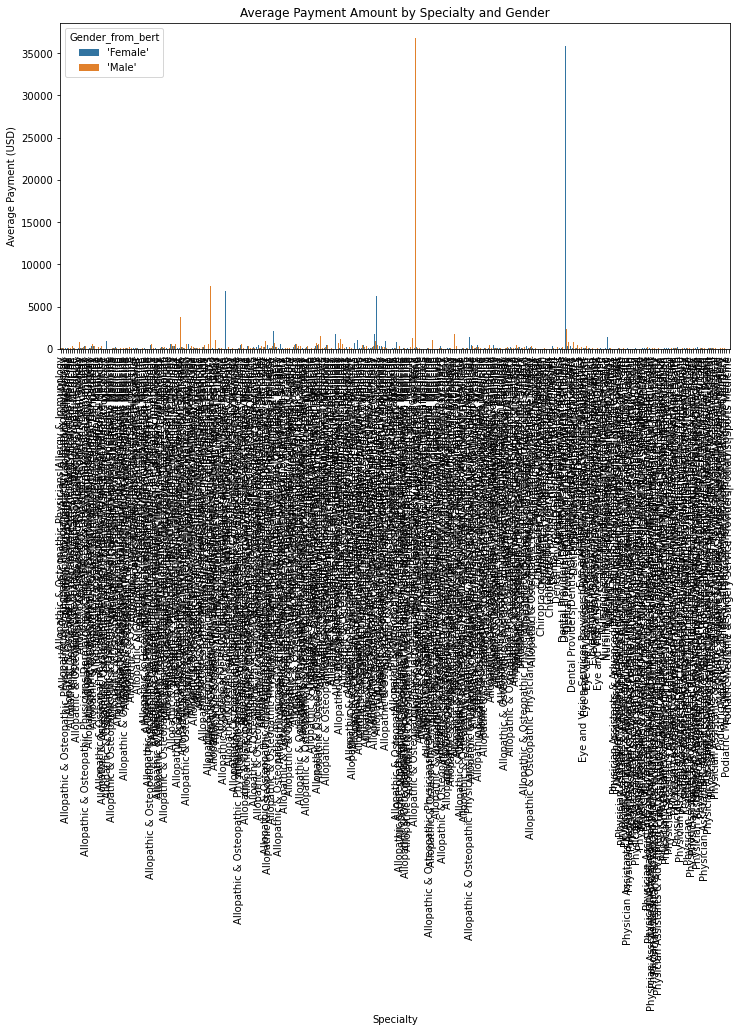

In [38]:
plt.figure(figsize=(12, 6))
avg_payment = df.groupby(['Covered_Recipient_Specialty_1', 'Gender_from_bert'])['Total_Amount_of_Payment_USDollars'].mean().reset_index()

sns.barplot(x='Covered_Recipient_Specialty_1', y='Total_Amount_of_Payment_USDollars', hue='Gender_from_bert', data=avg_payment)
plt.title('Average Payment Amount by Specialty and Gender')
plt.xticks(rotation=90)
plt.ylabel('Average Payment (USD)')
plt.xlabel('Specialty')
plt.show()
